In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install plotly

In [ ]:
# Import Dataset
fraud = pd.read_csv("/content/Fraud_check.csv")
print('Shape of the data',fraud.shape)
fraud.head(10)

Shape of the data (600, 6)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [ ]:
f_c1 = fraud.drop(['City.Population'], axis = 1)
f_c1


,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [ ]:
f_c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [ ]:
y1=np.empty(600, dtype=object)
i=0

for value in f_c1['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [ ]:
t1=pd.DataFrame(y1,columns=['Target'])
t1

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [ ]:
f_c = pd.concat([f_c1,t1],axis=1)
f_c.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [ ]:
f_c.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [ ]:
f_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [ ]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [ ]:
f_c.corr()

,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


In [ ]:
f_c.groupby(['Undergrad', 'Marital.Status' ,'Urban']).count()

Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
0         0              0                  53               53      53
                         1                  44               44      44
          1              0                  44               44      44
                         1                  47               47      47
          2              0                  46               46      46
                         1                  54               54      54
1         0              0                  50               50      50
                         1                  42               42      42
          1              0                  50               50      50
                         1                  53               53      53
          2              0                  55               55      55
                         1                  62               62      62

In [ ]:
label_encoder = preprocessing.LabelEncoder()
f_c['Undergrad']= label_encoder.fit_transform(f_c['Undergrad'])
f_c['Marital.Status']= label_encoder.fit_transform(f_c['Marital.Status'])
f_c['Urban']= label_encoder.fit_transform(f_c['Urban'])
f_c['Target']= label_encoder.fit_transform(f_c['Target'])

In [ ]:
f_c.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [ ]:
f_c.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

In [ ]:
colnames = list(f_c.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

# **Visualization**

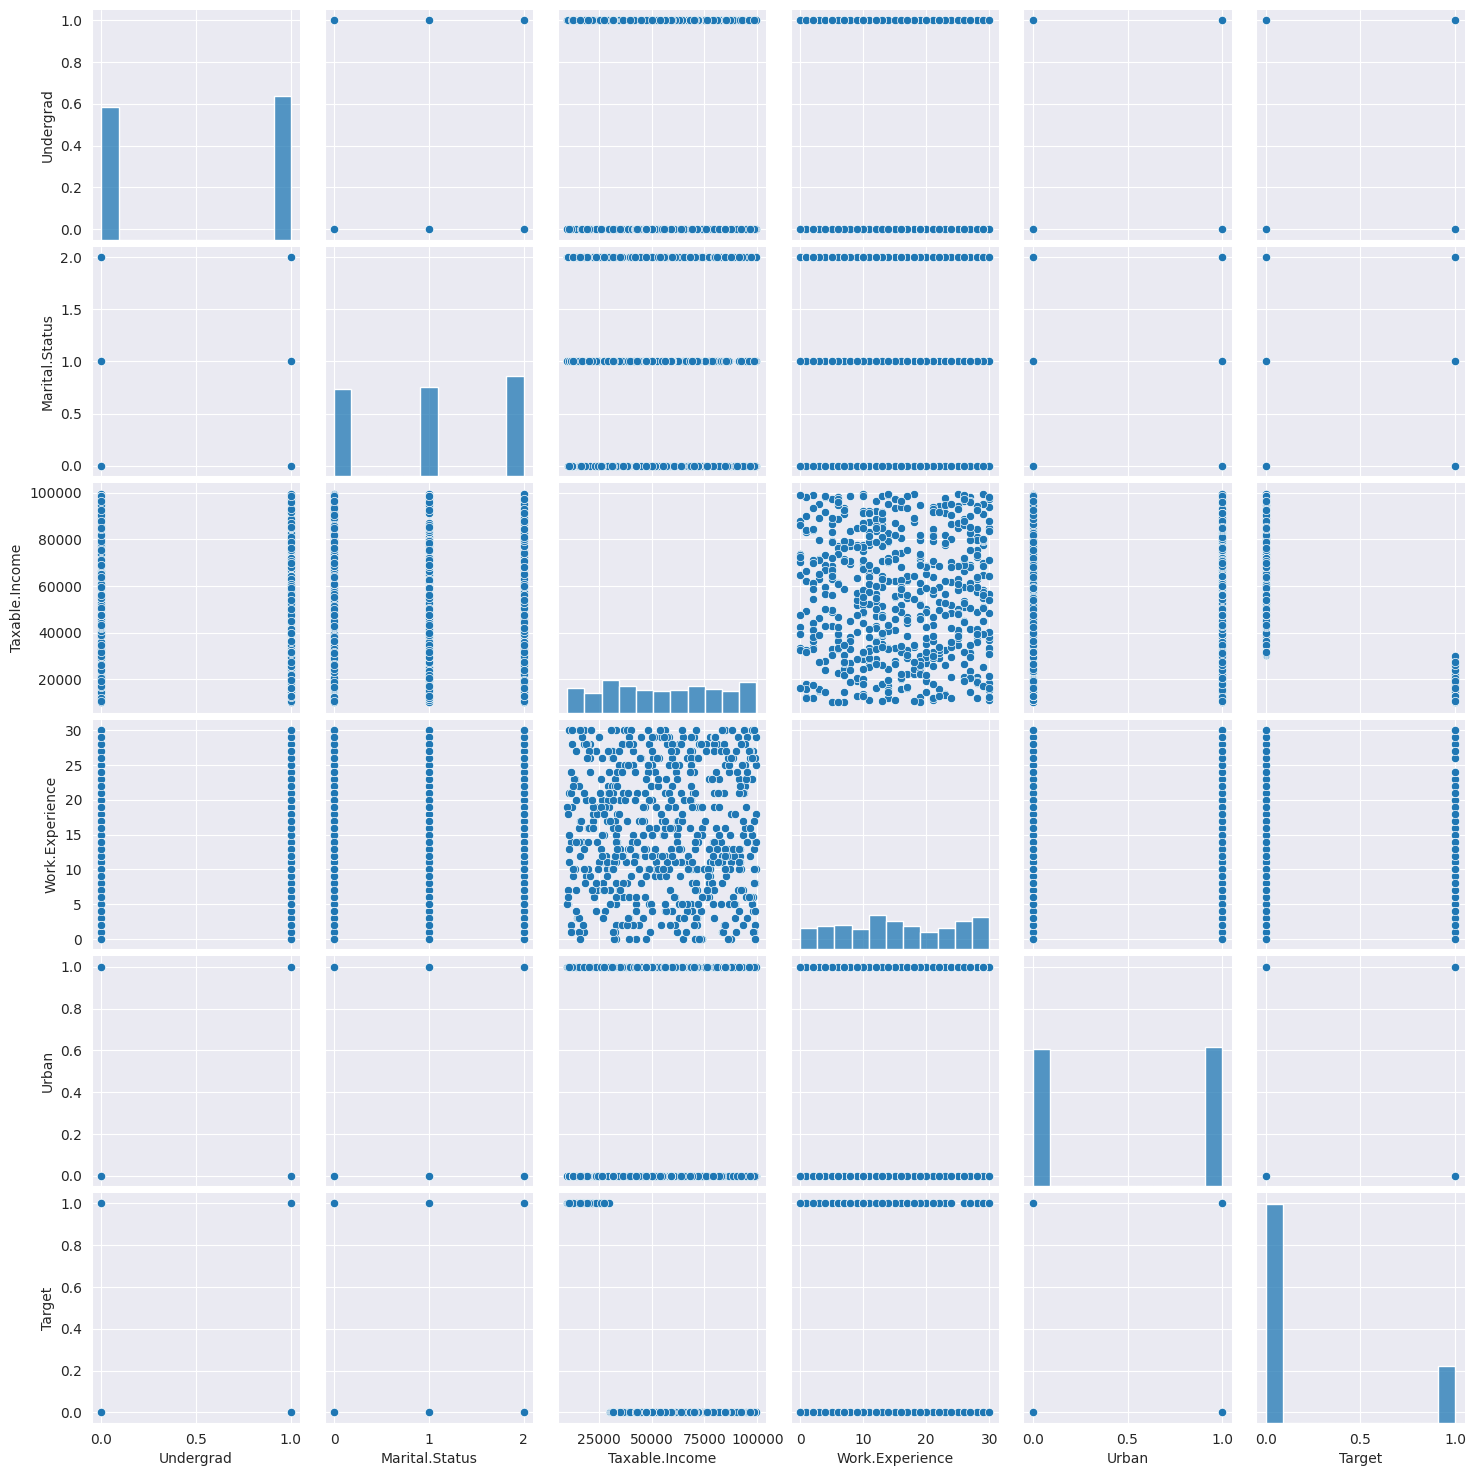

In [ ]:
sns.pairplot(f_c)

<Axes: xlabel='Taxable.Income', ylabel='Density'>

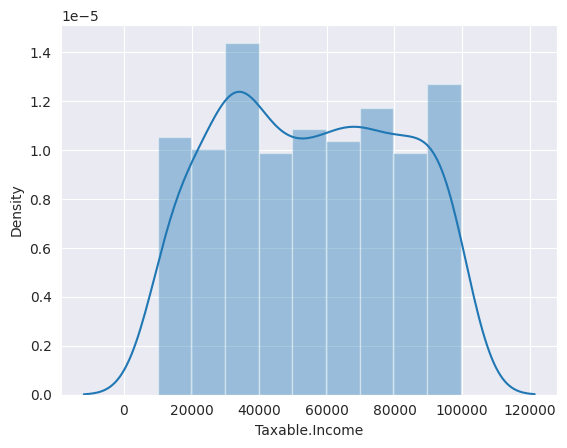

In [ ]:
sns.distplot(f_c['Taxable.Income'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

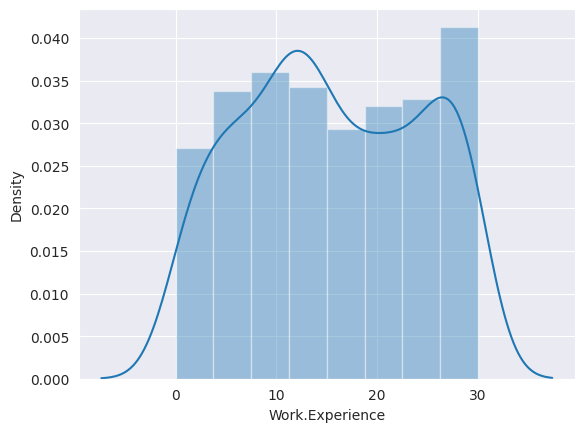

In [ ]:
sns.distplot(f_c['Work.Experience'])

<Axes: >

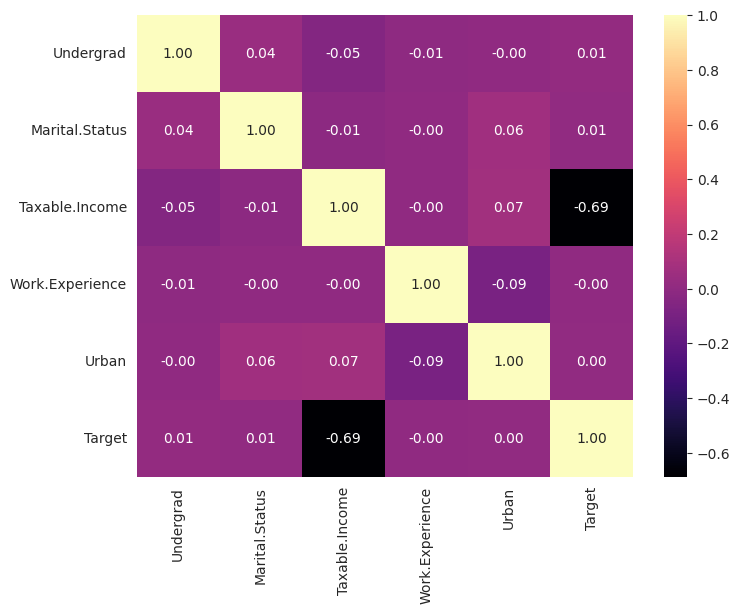

In [ ]:
plt.figure(figsize = (8, 6));
sns.heatmap(f_c.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

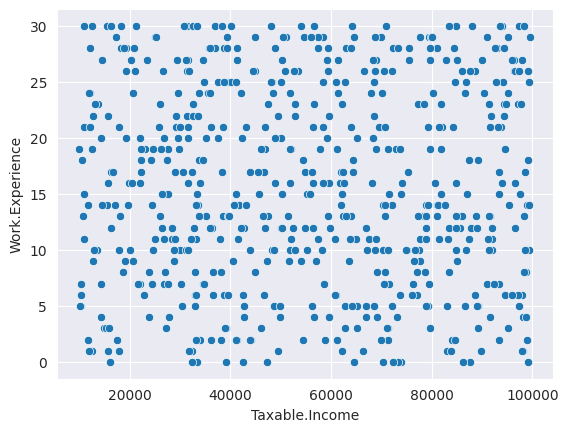

In [ ]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data = f_c)

In [ ]:
x=f_c.iloc[:,0:5]
y=f_c[['Target']]
x.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0


In [ ]:
y.tail()

,Target
595,0
596,0
597,0
598,0
599,0


## **Classifier using Entropy Criteria**

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=32)

In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

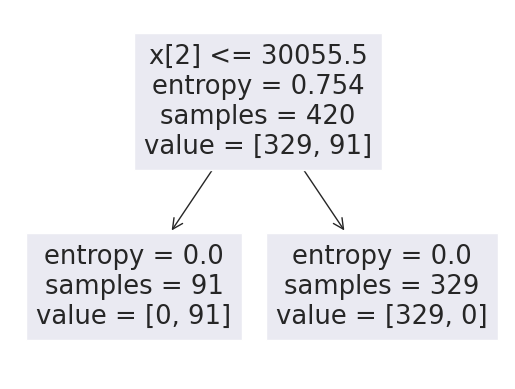

In [ ]:
tree.plot_tree(model2);                            #PLot the decision tree

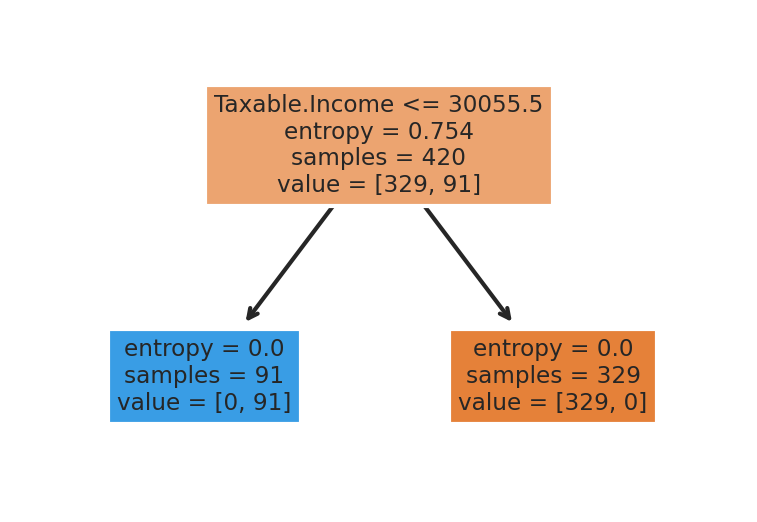

In [ ]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model2,
               feature_names = fn,
               #class_names=cn,
               filled = True);

In [ ]:
preds2 = model2.predict(x_test)
pd.Series(preds2).value_counts()

0    147
1     33
dtype: int64

In [ ]:
preds2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [ ]:
y_test

,Target
312,0
174,0
51,0
186,0
223,0
...,...
240,0
540,1
13,0
101,0


In [ ]:
y_test2 = y_test.to_numpy()
y_test2 = np.reshape(y_test2, 180)
y_test2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [ ]:
pd.crosstab(y_test2,preds2) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
row_0,,
0,147,0
1,0,33


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=32)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [ ]:
# Bagging classifier
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

In [ ]:
# Predictions on the testing set for each classifier
y_pred_dt = dt_clf.predict(x_test)
y_pred_ada = ada_clf.predict(x_test)
y_pred_bag = bag_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text, plot_tree

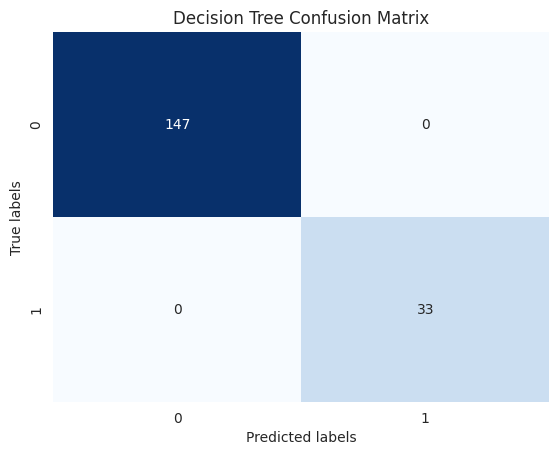

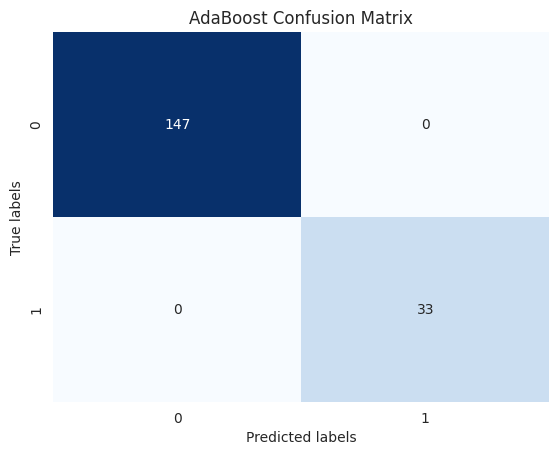

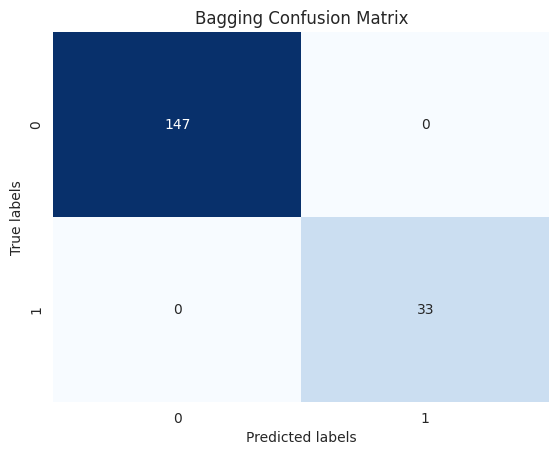

In [ ]:
# Plot confusion matrix for each classifier
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_ada, 'AdaBoost Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_bag, 'Bagging Confusion Matrix')

# **Classifier (CART) using Gini Criteria**

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.22,random_state=18)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model2_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_test

,Target
129,0
533,1
473,0
401,0
221,0
...,...
568,0
217,0
186,0
562,0


In [ ]:
y_test3 = y_test.to_numpy()
y_test3 = np.reshape(y_test3, 132)
y_test3

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
#Prediction and computing the accuracy
pred=model2.predict(x_test)
np.mean(pred==y_test3)

1.0

# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = f_c.values
X = array[:,0:5]
y = array[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
model.score(X_test,y_test)

1.0